# HW 0 - Intro to Pandas
Credit: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Object Creation


Creating a Series by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.216792,0.869476,-0.717643,0.422536
2013-01-02,-1.937694,0.585448,-0.440341,1.889013
2013-01-03,0.629775,1.026402,-1.058032,-1.645538
2013-01-04,-0.504103,-1.096218,-1.788986,0.676521
2013-01-05,-0.416964,1.555797,1.420616,1.977940
2013-01-06,0.063500,-2.523061,-0.291944,0.554034


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

View the top and bottom rows of the frame:

In [7]:
df.head()

,A,B,C,D
2013-01-01,-0.216792,0.869476,-0.717643,0.422536
2013-01-02,-1.937694,0.585448,-0.440341,1.889013
2013-01-03,0.629775,1.026402,-1.058032,-1.645538
2013-01-04,-0.504103,-1.096218,-1.788986,0.676521
2013-01-05,-0.416964,1.555797,1.420616,1.977940


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.504103,-1.096218,-1.788986,0.676521
2013-01-05,-0.416964,1.555797,1.420616,1.977940
2013-01-06,0.063500,-2.523061,-0.291944,0.554034


Display the index, columns:

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [11]:
df.values

array([[-0.2167915 ,  0.86947579, -0.71764338,  0.42253565],
       [-1.93769367,  0.58544814, -0.44034079,  1.88901319],
       [ 0.6297748 ,  1.02640167, -1.05803181, -1.64553753],
       [-0.50410287, -1.09621837, -1.78898601,  0.67652139],
       [-0.41696364,  1.55579718,  1.4206158 ,  1.97793981],
       [ 0.06349969, -2.52306054, -0.29194355,  0.55403394]])

In [12]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

.describe( ) shows a quick statistic summary of your data:

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.397046,0.069641,-0.479388,0.645751
std,0.858418,1.556353,1.072690,1.313744
min,-1.937694,-2.523061,-1.788986,-1.645538
25%,-0.482318,-0.675802,-0.972935,0.455410
50%,-0.316878,0.727462,-0.578992,0.615278
75%,-0.006573,0.987170,-0.329043,1.585890
max,0.629775,1.555797,1.420616,1.977940


Transposing your data:

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.216792,-1.937694,0.629775,-0.504103,-0.416964,0.063500
B,0.869476,0.585448,1.026402,-1.096218,1.555797,-2.523061
C,-0.717643,-0.440341,-1.058032,-1.788986,1.420616,-0.291944
D,0.422536,1.889013,-1.645538,0.676521,1.977940,0.554034


Sorting by an axis:

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.422536,-0.717643,0.869476,-0.216792
2013-01-02,1.889013,-0.440341,0.585448,-1.937694
2013-01-03,-1.645538,-1.058032,1.026402,0.629775
2013-01-04,0.676521,-1.788986,-1.096218,-0.504103
2013-01-05,1.977940,1.420616,1.555797,-0.416964
2013-01-06,0.554034,-0.291944,-2.523061,0.063500


Sorting by values:

In [16]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,0.063500,-2.523061,-0.291944,0.554034
2013-01-04,-0.504103,-1.096218,-1.788986,0.676521
2013-01-02,-1.937694,0.585448,-0.440341,1.889013
2013-01-01,-0.216792,0.869476,-0.717643,0.422536
2013-01-03,0.629775,1.026402,-1.058032,-1.645538
2013-01-05,-0.416964,1.555797,1.420616,1.977940


## Selection

### Getting 

Selecting a single column, which yields a Series, equivalent to df.A:

In [17]:
df['A']

2013-01-01   -0.216792
2013-01-02   -1.937694
2013-01-03    0.629775
2013-01-04   -0.504103
2013-01-05   -0.416964
2013-01-06    0.063500
Freq: D, Name: A, dtype: float64

Selecting via [ ], which slices the rows.

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,-0.216792,0.869476,-0.717643,0.422536
2013-01-02,-1.937694,0.585448,-0.440341,1.889013
2013-01-03,0.629775,1.026402,-1.058032,-1.645538


In [19]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.937694,0.585448,-0.440341,1.889013
2013-01-03,0.629775,1.026402,-1.058032,-1.645538
2013-01-04,-0.504103,-1.096218,-1.788986,0.676521


### Selection by label

For getting a cross section using a label:

In [20]:
df.loc[dates[0]]

A   -0.216792
B    0.869476
C   -0.717643
D    0.422536
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [21]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.216792,0.869476
2013-01-02,-1.937694,0.585448
2013-01-03,0.629775,1.026402
2013-01-04,-0.504103,-1.096218
2013-01-05,-0.416964,1.555797
2013-01-06,0.063500,-2.523061


Showing label slicing, both endpoints are included:

In [22]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-1.937694,0.585448
2013-01-03,0.629775,1.026402
2013-01-04,-0.504103,-1.096218


Reduction in the dimensions of the returned object:

In [23]:
df.loc['20130102', ['A', 'B']]

A   -1.937694
B    0.585448
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [24]:
df.loc[dates[0], 'A']

-0.21679150017014084

For getting fast access to a scalar (equivalent to the prior method):

In [25]:
df.at[dates[0], 'A']

-0.21679150017014084

### Selection by position

Select via the position of the passed integers:

In [26]:
df.iloc[3]

A   -0.504103
B   -1.096218
C   -1.788986
D    0.676521
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.504103,-1.096218
2013-01-05,-0.416964,1.555797


By lists of integer position locations, similar to the numpy/python style:

In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.937694,-0.440341
2013-01-03,0.629775,-1.058032
2013-01-05,-0.416964,1.420616


For slicing rows explicitly:

In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.937694,0.585448,-0.440341,1.889013
2013-01-03,0.629775,1.026402,-1.058032,-1.645538


For slicing columns explicitly:

In [30]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.869476,-0.717643
2013-01-02,0.585448,-0.440341
2013-01-03,1.026402,-1.058032
2013-01-04,-1.096218,-1.788986
2013-01-05,1.555797,1.420616
2013-01-06,-2.523061,-0.291944


For getting a value explicitly:

In [31]:
df.iloc[1, 1]

0.5854481376973151

For getting fast access to a scalar (equivalent to the prior method):

In [32]:
df.iat[1, 1]

0.5854481376973151

### Boolean Indexing

Selecting values from a DataFrame where a boolean condition is met.

In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.869476,NaN,0.422536
2013-01-02,NaN,0.585448,NaN,1.889013
2013-01-03,0.629775,1.026402,NaN,NaN
2013-01-04,NaN,NaN,NaN,0.676521
2013-01-05,NaN,1.555797,1.420616,1.977940
2013-01-06,0.063500,NaN,NaN,0.554034


Using the isin() method for filtering:

In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.216792,0.869476,-0.717643,0.422536,one
2013-01-02,-1.937694,0.585448,-0.440341,1.889013,one
2013-01-03,0.629775,1.026402,-1.058032,-1.645538,two
2013-01-04,-0.504103,-1.096218,-1.788986,0.676521,three
2013-01-05,-0.416964,1.555797,1.420616,1.977940,four
2013-01-06,0.063500,-2.523061,-0.291944,0.554034,three


In [35]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.629775,1.026402,-1.058032,-1.645538,two
2013-01-05,-0.416964,1.555797,1.420616,1.977940,four


### Setting

Setting a new column automatically aligns the data by the indexes.

In [36]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [37]:
df['F'] = s1

Setting values by label:

In [38]:
df.at[dates[0], 'A'] = 0

Setting values by position:

In [39]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [40]:
df.loc[:, 'D'] = np.array([5] * len(df))

The result of the prior setting operations.

In [41]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.717643,5,NaN
2013-01-02,-1.937694,0.585448,-0.440341,5,1.0
2013-01-03,0.629775,1.026402,-1.058032,5,2.0
2013-01-04,-0.504103,-1.096218,-1.788986,5,3.0
2013-01-05,-0.416964,1.555797,1.420616,5,4.0
2013-01-06,0.063500,-2.523061,-0.291944,5,5.0


A where operation with setting.

In [42]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.717643,-5,NaN
2013-01-02,-1.937694,-0.585448,-0.440341,-5,-1.0
2013-01-03,-0.629775,-1.026402,-1.058032,-5,-2.0
2013-01-04,-0.504103,-1.096218,-1.788986,-5,-3.0
2013-01-05,-0.416964,-1.555797,-1.420616,-5,-4.0
2013-01-06,-0.063500,-2.523061,-0.291944,-5,-5.0


### Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1], 'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.717643,5,NaN,1.0
2013-01-02,-1.937694,0.585448,-0.440341,5,1.0,1.0
2013-01-03,0.629775,1.026402,-1.058032,5,2.0,NaN
2013-01-04,-0.504103,-1.096218,-1.788986,5,3.0,NaN


** To drop any rows that have missing data. **

In [44]:
df1.dropna()

,A,B,C,D,F,E
2013-01-02,-1.937694,0.585448,-0.440341,5,1.0,1.0


Filling missing data.

In [45]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.717643,5,5.0,1.0
2013-01-02,-1.937694,0.585448,-0.440341,5,1.0,1.0
2013-01-03,0.629775,1.026402,-1.058032,5,2.0,5.0
2013-01-04,-0.504103,-1.096218,-1.788986,5,3.0,5.0


To get the boolean mask where values are nan

In [46]:
df1.isnull()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats

Performing a descriptive statistic:

In [47]:
df.mean()

A   -0.360914
B   -0.075272
C   -0.479388
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [48]:
df.mean(1)

2013-01-01    1.070589
2013-01-02    0.841483
2013-01-03    1.519629
2013-01-04    0.922139
2013-01-05    2.311890
2013-01-06    1.449699
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [49]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [50]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.370225,0.026402,-2.058032,4.0,1.0
2013-01-04,-3.504103,-4.096218,-4.788986,2.0,0.0
2013-01-05,-5.416964,-3.444203,-3.579384,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply 

Applying functions to the data:

In [51]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.717643,5,NaN
2013-01-02,-1.937694,0.585448,-1.157984,10,1.0
2013-01-03,-1.307919,1.611850,-2.216016,15,3.0
2013-01-04,-1.812022,0.515631,-4.005002,20,6.0
2013-01-05,-2.228985,2.071429,-2.584386,25,10.0
2013-01-06,-2.165486,-0.451632,-2.876330,30,15.0


### Histrogramming

In [52]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    1
2    2
3    0
4    0
5    0
6    1
7    5
8    2
9    5
dtype: int64

In [53]:
s.value_counts()

2    3
0    3
5    2
1    2
dtype: int64

### String Method

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them).

In [54]:
s = pd.Series(['A', 'B', 'C', 'AaBa', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    AaBa
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [55]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with concat():

In [56]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.149920,1.829421,-0.251465,-1.390642
1,-0.127240,-1.308673,0.828052,0.381167
2,1.342126,-0.826334,0.280811,-2.395512
3,1.457558,-0.492657,-0.360936,0.919247
4,-0.011267,0.008884,0.137289,3.031750
5,-1.401702,0.235907,0.205958,-0.314350
6,-1.569335,-0.468117,-1.105207,0.134184
7,-0.266756,-2.182391,-1.540093,0.221617
8,-0.673679,-1.086785,-1.232923,-2.645304
9,0.661174,0.711095,0.251782,-2.531196


In [57]:
# Break it into pieces
pieces = [df[0:3], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.149920,1.829421,-0.251465,-1.390642
1,-0.127240,-1.308673,0.828052,0.381167
2,1.342126,-0.826334,0.280811,-2.395512
7,-0.266756,-2.182391,-1.540093,0.221617
8,-0.673679,-1.086785,-1.232923,-2.645304
9,0.661174,0.711095,0.251782,-2.531196


### Join

SQL style merges

In [58]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another Example:

In [59]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

Append rows to a dataframe. 

In [60]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.453359,-0.774298,0.174323,1.455699
1,0.257977,-0.548224,-0.312310,-0.104507
2,1.317780,-1.451715,-1.699757,1.502234
3,0.471066,-1.869397,-0.301062,1.295517
4,-0.394846,-0.886622,0.385663,0.294075
5,1.458990,1.041787,-1.176775,-0.736701
6,1.859157,-0.422344,-0.395933,-2.362729
7,0.296172,1.078052,0.537923,-0.595075


In [61]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.453359,-0.774298,0.174323,1.455699
1,0.257977,-0.548224,-0.312310,-0.104507
2,1.317780,-1.451715,-1.699757,1.502234
3,0.471066,-1.869397,-0.301062,1.295517
4,-0.394846,-0.886622,0.385663,0.294075
5,1.458990,1.041787,-1.176775,-0.736701
6,1.859157,-0.422344,-0.395933,-2.362729
7,0.296172,1.078052,0.537923,-0.595075
8,0.471066,-1.869397,-0.301062,1.295517


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [62]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.142193,-0.688468
1,bar,one,0.852526,-1.819473
2,foo,two,-1.790698,0.034664
3,bar,three,0.048603,0.601071
4,foo,two,0.980830,0.874806
5,bar,two,-1.552395,0.012017
6,foo,one,-1.083347,-1.245861
7,foo,three,-0.127492,0.097340


Grouping and then applying the sum() function to the resulting groups.

In [63]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.651266,-1.206384
foo,-0.878514,-0.927519


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [64]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.852526 -1.819473
    three  0.048603  0.601071
    two   -1.552395  0.012017
foo one    0.058846 -1.934329
    three -0.127492  0.097340
    two   -0.809868  0.909470

## Plotting

<AxesSubplot:>

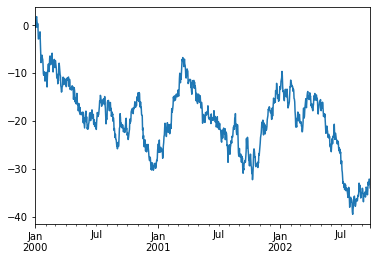

In [65]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<AxesSubplot:>

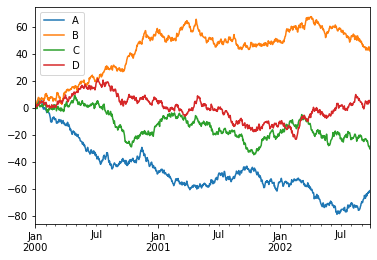

In [66]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

df.plot()

## Getting data in/out

### CSV

In [67]:
df.to_csv('foo.csv')

In [68]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.343377,0.174326,1.079947,0.080071
1,2000-01-02,-0.720309,1.481150,1.655744,0.096327
2,2000-01-03,-0.018529,1.592030,1.797495,0.450909
3,2000-01-04,1.100121,3.798839,0.942589,1.313108
4,2000-01-05,0.696475,2.874684,-0.194786,2.587383
